Usaremos la base de datos [Covertype Data Set](https://archive.ics.uci.edu/ml/datasets/Covertype). Esta base de datos contiene información sobre tipos de bósques, capturada para pequeñas regiones de 30x30 metros. Los datos fueron colectados por el US Forest Service (USFS). Las variables independientes 'X' son cartográficas, y sus respectivas etiquetas 'Y' son enteros [1, 7] indicando 7 posibles clases de bosque.

El objetivo es diseñar redes neuronales que, con ayuda de regularizadores, sean capaces de obtener buen desempeño de clasificación multiclase, tanto en los datos de entrenamiento, como en los de validación y los de prueba, i.e., sin sobre ajuste.

# Part 1: Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Read data file
df = pd.read_csv('covtype.csv') # Cambia al nombre del archivo que cargues
df.dropna(inplace=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
# Look at label's distribution
df['Cover_Type'].value_counts() # Base de datos desbalanceada.

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [4]:
# Balance dataset
def sampling_k_elements(group, N=2700):
  if len(group) < N:
    return group
  return group.sample(N)

df = df.groupby('Cover_Type').apply(sampling_k_elements).reset_index(drop=True)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2699,7,8,0,0,2131,211,225,151,6850,...,0,0,0,0,0,0,0,0,0,1
1,2932,83,11,212,19,4842,235,221,116,2724,...,0,0,0,0,0,0,0,0,0,1
2,3372,214,7,987,170,2975,214,247,169,1266,...,0,0,0,0,0,0,1,0,0,1
3,3011,207,10,228,-2,5597,214,249,170,2768,...,0,0,0,0,0,0,0,0,0,1
4,3145,148,26,666,264,1127,244,228,96,2858,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,3453,116,8,870,220,2254,235,232,129,1495,...,0,0,0,1,0,0,0,0,0,7
18896,3236,27,11,85,12,4085,215,217,137,2670,...,0,0,0,0,0,0,0,1,0,7
18897,3336,256,10,134,14,3780,197,246,187,1908,...,0,0,0,0,0,0,1,0,0,7
18898,3366,137,21,212,71,853,247,227,99,1087,...,0,0,0,0,0,0,0,0,0,7


In [5]:
# Look at label's distribution
df['Cover_Type'].value_counts() # Base de datos desbalanceada.

1    2700
2    2700
3    2700
4    2700
5    2700
6    2700
7    2700
Name: Cover_Type, dtype: int64

In [6]:
# Split training, validation, and test sets
df_train, df_test = train_test_split(df, test_size=0.1)
df_train, df_val = train_test_split(df_train, test_size=0.1)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(15309, 55)
(1701, 55)
(1890, 55)


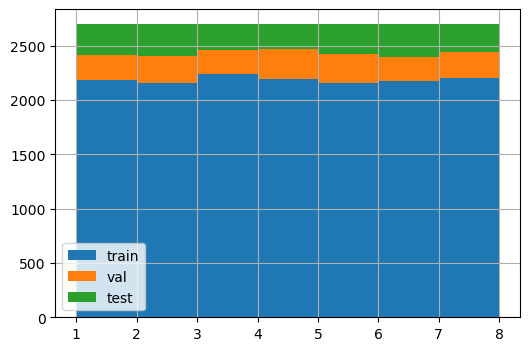

In [7]:
# Visualize distribution of splits
plt.figure(figsize=(6, 4))
plt.hist([df_train['Cover_Type'], df_val['Cover_Type'], df_test['Cover_Type']],
         bins=range(1, 9), stacked=True, label=['train', 'val', 'test'])
plt.legend()
plt.grid()
plt.show()

### == Q1 ==

En la celda siguiente convertimos las etiquetas a formato *one-hot enconding*. Nota que definimos `num_classes=8`, aunque la base de datos sólo contiene 7 clases. Revisa la documentación de la función `to_categorical()` para entender por qué indicamos 8 clases en nuestra conversión. Reporta tu respuesta.

R = La función `to_cagetorical()` espera como parámetro un vector numérico con valores entre 0 y `num_classes - 1`, lo que implica que si nosotros ponemos como parámetro `num_classes = 8` entonces la función intentará convertir a matriz desde 0 hasta `num_classes - 1 = 8 - 1 = 7`, de esta manera nos aseguramos de que todos los valores que toma el vector son codificados. En cambio, si pusiéramos `num_classes = 7`, entonces la codificación se hace desde 0 hasta `num_classes - 1 = 7 - 1 = 6`, dejando de lado la clase con valor de 7.0 y causando un error. 

In [8]:
# Extract labels as matrices
y_train = df_train['Cover_Type'].to_numpy()
y_val = df_val['Cover_Type'].to_numpy()
y_test = df_test['Cover_Type'].to_numpy()
print(y_test[:10])

# And turn them into one-hot encoding format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=8)[:, 1:]
y_val = to_categorical(y_val, num_classes=8)[:, 1:]
y_test = to_categorical(y_test,num_classes=8)[:, 1:]

print("Y shapes")
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)
print(y_test[:10])

[7 4 5 6 4 1 4 3 5 1]


2023-02-13 23:00:58.584692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Y shapes
y_train: (15309, 7)
y_val: (1701, 7)
y_test: (1890, 7)
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


X shapes
x_train: (15309, 54)
x_val: (1701, 54)
x_test: (1890, 54)


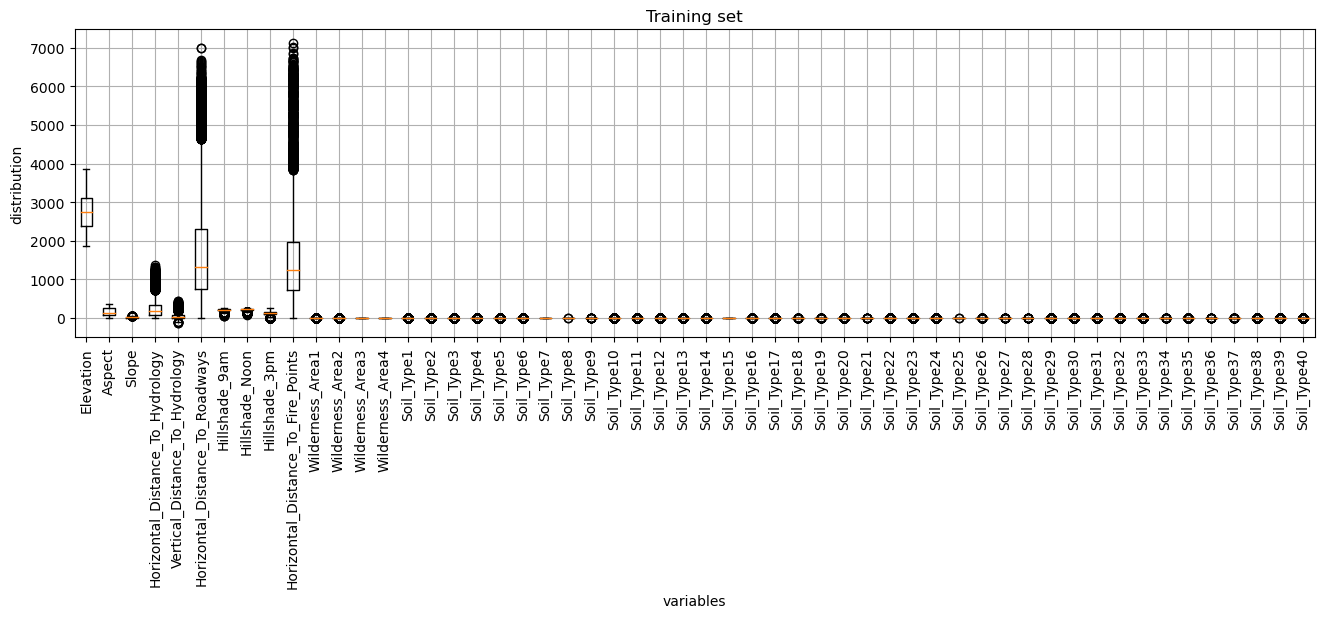

In [9]:
# Extract independent variables as matrices
x_train = df_train.to_numpy()[:, :-1]
x_val = df_val.to_numpy()[:, :-1]
x_test = df_test.to_numpy()[:, :-1]

print("X shapes")
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)

plt.figure(figsize=(16, 4))
plt.title('Training set')
plt.boxplot(x_train)
plt.xticks(range(1, 55), df.columns[:-1], rotation=90)
plt.xlabel('variables')
plt.ylabel('distribution')
plt.grid()
plt.show()

# Part 2: Create DNN model and train it

In [3]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

2023-02-21 19:46:52.771801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


La celda siguiente contiene una función auxiliar para crear ANN.

Más adelante verás dos corridas de una misma arquitectura. La primera se entrenó por 200 épocas y resultó en sobre ajuste. La segunda usó early stopping para evitar sobre ajuste, pero resultó en sub ajuste. Encuentra un modelo que tenga buen desempeño de entrenamiento y bajo error de generalización. 

Tip, la forma común de hacer en DL es la siguiente:
1. Encuentra el mejor modelo posible para el set de entrenamiento (quizás genere sobre ajuste).
2. Si no hay sobre ajuste, ya terminamos.
3. Si hay sobre ajuste, ahora incluyamos regularizadores para disminuir el error de generalización.
4. Es posible que al añadir regularizadores comprometamos el desempeño que el modelo había obtenido en el set de entrenamiento, de manera que quizás sea necesario aumentar la capacidad del modelo (más parámetros). Por lo tanto este proceso se vuelve iterativo.

Nota que importamos layers tipo BatchNorm y Dropout, los cuales pueden ser usados en distintas secciones del modelo. También importamos regularizadores l1, l2, y l1_l2, los cuales pueden ser usados como argumentos de las capas de la red.

Puedes usar early stopping si lo consideras de utilidad.

### == Q2 ==

¿Por qué usamos softmax en la salida de la red?

R= Softmax es una función de activación usada en problemas de clasificación multiclase debido a que funciona como un normalizador de probabilidades, lo que permite denotar cuál es la clase más probable a la salida para un vector de información a la entrada.

### == Q3 ==

Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento" menor o igual a 0.08 y exactitud mayor o igual a 98%. Reporta el número de capas, número de unidades en cada capa, y número de parámetros.

In [11]:
# AUX function to create a model
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=x_train.shape[1:]))

  DNN.add(Dense(128))
  DNN.add(LeakyReLU(0.15)) # LeakyReLU esta definido como layer. Por eso el layer anterior sólo hace combinación lineal
  DNN.add(Dropout(0.1)) # para Dropout debemos indicar el %
  DNN.add(Dense(128, activation='relu', kernel_regularizer=l1(1e-4))) # uso de regularizador L1 con alfa = 1e-4
  DNN.add(BatchNormalization()) # Uso de batchnorm
  DNN.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-6))) # uso de regularizador L2 con alfa = 1e-6
  DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
  # Los regularizadores podemos combinarlos como queramos/necesitemos
  return DNN

In [12]:
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=x_train.shape[1:]))

  DNN.add(Dense(128, activation='relu'))
  DNN.add(Dense(128, activation='relu'))
  DNN.add(Dense(128, activation='relu'))
  DNN.add(Dense(64, activation='relu'))
  DNN.add(Dense(64, activation='relu'))
  DNN.add(Dense(64, activation='relu'))
  DNN.add(Dense(32, activation='relu'))
  DNN.add(Dense(32, activation='relu'))
  DNN.add(Dense(32, activation='relu'))
  DNN.add(Dense(32, activation='relu'))
  DNN.add(Dense(16, activation='relu'))
  DNN.add(Dense(16, activation='relu'))
  DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
  return DNN

In [13]:
# Create a Deep Network
DNN = create_model()
DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2

2023-02-13 23:01:05.541836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Define training parameters
DNN.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['categorical_accuracy', tf.keras.metrics.FalseNegatives()])

### == Q6 ==
En la celda anterior usamos 'categorical_accuracy' como métrica de monitoreo. Revisa la documentación de tensorflow, y explica la diferencia entre las métricas `accuracy`, `binary_accuracy`, y `categorical_accuracy`.

R= `binary_accuracy` mide la cantidad de veces que las predicciones son iguales a las clases en un problema de clasificación binaria. `accuracy` mide la cantidad de veces que las predicciones son iguales a las clases numéricas en un problema de clasificación para una sola variable de salida pero que toma distintos valores numéricos. `categorical_accuracy` mide la cantidad de veces que las predicciones son iguales a las clases one-hot encoding. 

In [15]:
# Train model
DNN.fit(x=x_train, y=y_train, batch_size=256, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
60/60 [==============================] - 1s 5ms/step - loss: 1.8391 - categorical_accuracy: 0.2544 - false_negatives: 14658.0000 - val_loss: 1.6789 - val_categorical_accuracy: 0.3486 - val_false_negatives: 1544.0000
Epoch 2/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.6386 - categorical_accuracy: 0.3247 - false_negatives: 14157.0000 - val_loss: 1.5390 - val_categorical_accuracy: 0.3827 - val_false_negatives: 1470.0000
Epoch 3/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.3761 - categorical_accuracy: 0.4234 - false_negatives: 12324.0000 - val_loss: 1.1449 - val_categorical_accuracy: 0.5044 - val_false_negatives: 1189.0000
Epoch 4/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.1501 - categorical_accuracy: 0.5064 - false_negatives: 10725.0000 - val_loss: 1.0753 - val_categorical_accuracy: 0.5332 - val_false_negatives: 1122.0000
Epoch 5/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.0963 - c

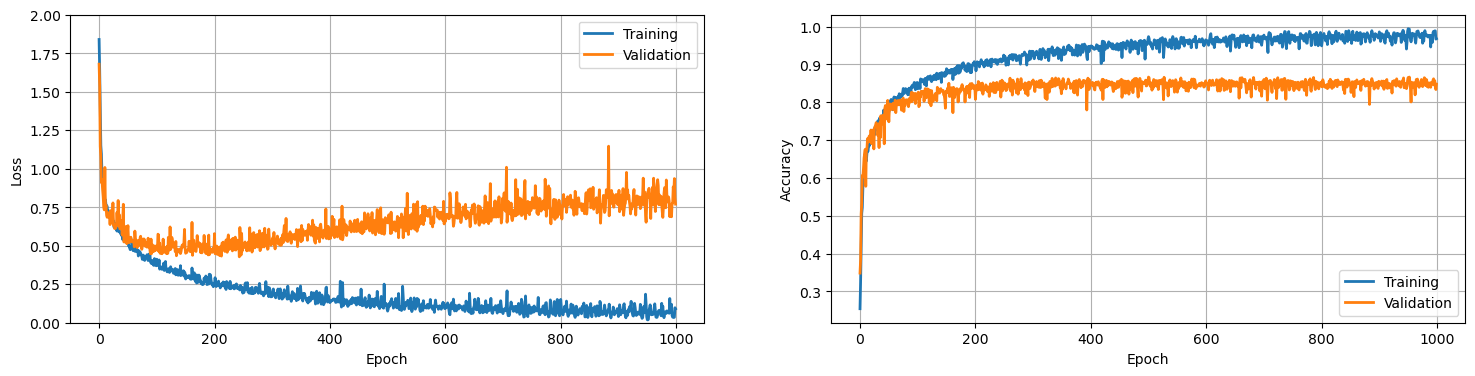

In [16]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

### == Q4 ==

Ahora usa esos mismos valores de hiperparámetros (número de capas y unidades) en el siguiente modelo, y añade capas dropout (ajusta sus tasa), capas batchnorm, y regularizadores l1 o l2 (ajusta sus alfas) para disminuir el error de generalización. Reporta el modelo regularizado que te haya dado mejores resultados.

In [4]:
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=30))
  DNN.add(Dense(512, activation='relu'))
  #DNN.add(Dense(128, activation='relu'))
  #DNN.add(Dense(32, activation='relu'))
  #DNN.add(Dense(units=6, activation='softmax'))
  return DNN

# Create a Deep Network
DNN = create_model()
DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 85,862
Trainable params: 85,862
Non-trainable params: 0
_________________________________________________________________


2023-02-21 19:46:55.942423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=x_train.shape[1:]))

  DNN.add(Dense(128, activation='relu'))
  DNN.add(Dropout(0.05))
  DNN.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dropout(0.15))
  DNN.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dropout(0.05))
  DNN.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dropout(0.15))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dropout(0.05))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dropout(0.05))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dropout(0.15))
  DNN.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-3)))
  DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
  return DNN

# Create a Deep Network
DNN = create_model()
DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               7040      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [23]:
# Define training parameters
DNN.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['categorical_accuracy', tf.keras.metrics.FalseNegatives()])

# Train model
DNN.fit(x=x_train, y=y_train, batch_size=256, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
60/60 [==============================] - 1s 6ms/step - loss: 3.1328 - categorical_accuracy: 0.1421 - false_negatives_1: 15124.0000 - val_loss: 2.4870 - val_categorical_accuracy: 0.1793 - val_false_negatives_1: 1701.0000
Epoch 2/1000
60/60 [==============================] - 0s 3ms/step - loss: 2.4770 - categorical_accuracy: 0.1429 - false_negatives_1: 15308.0000 - val_loss: 2.4388 - val_categorical_accuracy: 0.1540 - val_false_negatives_1: 1701.0000
Epoch 3/1000
60/60 [==============================] - 0s 3ms/step - loss: 2.4233 - categorical_accuracy: 0.1709 - false_negatives_1: 15307.0000 - val_loss: 2.3599 - val_categorical_accuracy: 0.2122 - val_false_negatives_1: 1701.0000
Epoch 4/1000
60/60 [==============================] - 0s 3ms/step - loss: 2.3202 - categorical_accuracy: 0.2160 - false_negatives_1: 15264.0000 - val_loss: 2.2391 - val_categorical_accuracy: 0.2081 - val_false_negatives_1: 1701.0000
Epoch 5/1000
60/60 [==============================] - 0s 3ms/step - 

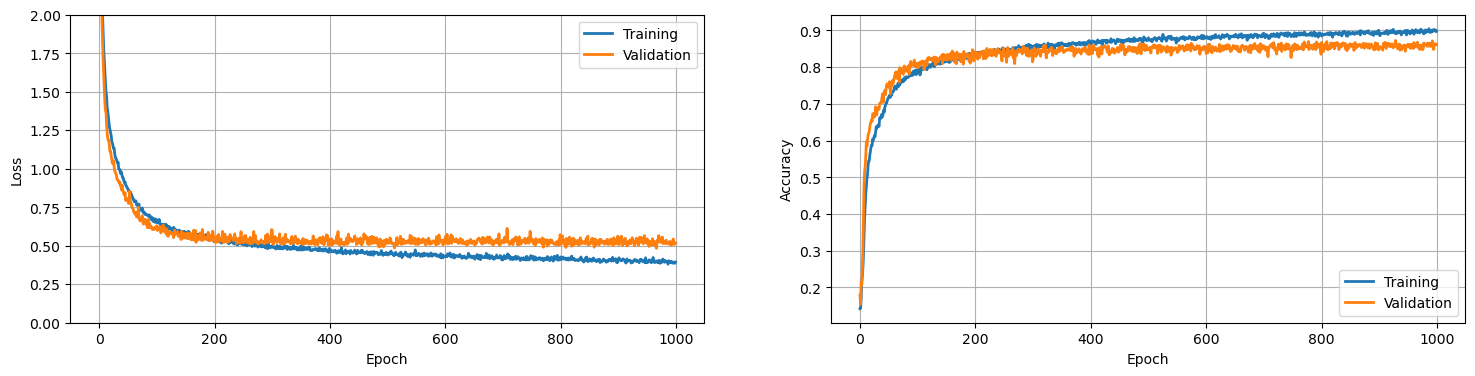

In [24]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

### == Q5 ==

Partiendo del mejor modelo que hayas obtenido anteriormente, modifica el número de sus capas y unidades para disminuir aún más los errores, tanto el de entrenamiento como el de validación (i.e., dale mayor capacidad). Reporta tu mejor modelo.

In [29]:
def create_model():
  DNN = Sequential()
  DNN.add(InputLayer(input_shape=x_train.shape[1:]))

  DNN.add(Dense(128, activation='relu'))
  DNN.add(Dropout(0.025))
  DNN.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dropout(0.11))
  DNN.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dropout(0.025))
  DNN.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dropout(0.11))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dropout(0.025))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dropout(0.025))
  DNN.add(Dense(32, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dropout(0.11))
  DNN.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-5)))
  DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
  return DNN

# Create a Deep Network
DNN = create_model()
DNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               7040      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)               

In [30]:
# Define training parameters
DNN.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['categorical_accuracy', tf.keras.metrics.FalseNegatives()])

# Train model
DNN.fit(x=x_train, y=y_train, batch_size=64, epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
240/240 [==============================] - 1s 2ms/step - loss: 2.0781 - categorical_accuracy: 0.1868 - false_negatives_2: 15184.0000 - val_loss: 1.7864 - val_categorical_accuracy: 0.2404 - val_false_negatives_2: 1701.0000
Epoch 2/1000
240/240 [==============================] - 0s 2ms/step - loss: 1.7529 - categorical_accuracy: 0.2454 - false_negatives_2: 15205.0000 - val_loss: 1.5954 - val_categorical_accuracy: 0.2904 - val_false_negatives_2: 1701.0000
Epoch 3/1000
240/240 [==============================] - 0s 2ms/step - loss: 1.5326 - categorical_accuracy: 0.3273 - false_negatives_2: 14361.0000 - val_loss: 1.3410 - val_categorical_accuracy: 0.4950 - val_false_negatives_2: 1645.0000
Epoch 4/1000
240/240 [==============================] - 0s 2ms/step - loss: 1.3281 - categorical_accuracy: 0.4193 - false_negatives_2: 12883.0000 - val_loss: 1.0775 - val_categorical_accuracy: 0.5603 - val_false_negatives_2: 1246.0000
Epoch 5/1000
240/240 [==============================] - 0s 2

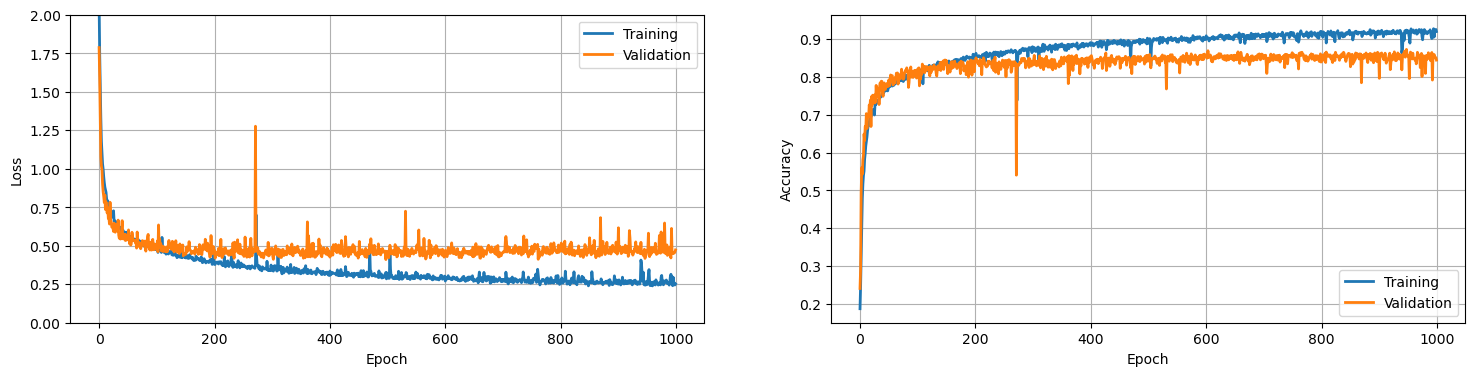

In [31]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Train another model using earlystopping
DNN2 = create_model()
DNN2.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['categorical_accuracy', tf.keras.metrics.FalseNegatives()])
DNN2.fit(x=x_train, y=y_train, batch_size=64, epochs=300, validation_data=(x_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/300
240/240 [==============================] - 26s 5ms/step - loss: 10.3491 - categorical_accuracy: 0.3451 - false_negatives_1: 10133.0000 - val_loss: 6.1950 - val_categorical_accuracy: 0.3163 - val_false_negatives_1: 1168.0000
Epoch 2/300
240/240 [==============================] - 1s 4ms/step - loss: 3.5491 - categorical_accuracy: 0.4422 - false_negatives_1: 8738.0000 - val_loss: 3.2516 - val_categorical_accuracy: 0.4691 - val_false_negatives_1: 920.0000
Epoch 3/300
240/240 [==============================] - 1s 4ms/step - loss: 2.0892 - categorical_accuracy: 0.5103 - false_negatives_1: 7796.0000 - val_loss: 3.2016 - val_categorical_accuracy: 0.4209 - val_false_negatives_1: 1007.0000
Epoch 4/300
240/240 [==============================] - 1s 3ms/step - loss: 1.9155 - categorical_accuracy: 0.5354 - false_negatives_1: 7470.0000 - val_loss: 2.4568 - val_categorical_accuracy: 0.4533 - val_false_negatives_1: 946.0000
Epoch 5/300
240/240 [==============================] - 1s 3ms/step 

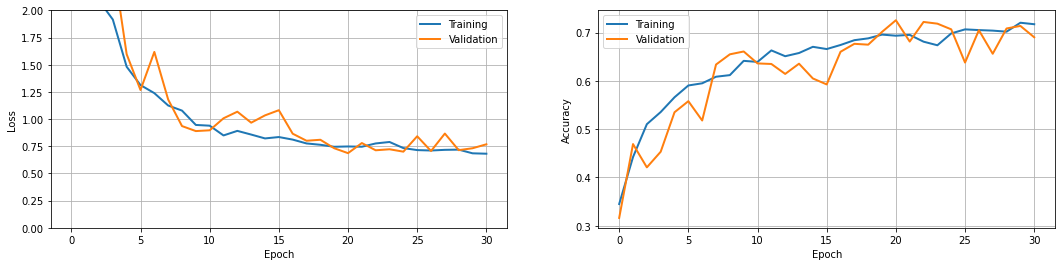

In [ ]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(DNN2.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN2.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN2.history.history['categorical_accuracy'], label='Training', linewidth=2)
plt.plot(DNN2.history.history['val_categorical_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [32]:
# Compute test loss
test_loss = DNN.evaluate(x=x_test, y=y_test, verbose=False)
test_loss

[0.4891790449619293, 0.8465608358383179, 303.0]

In [33]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test_hat[:10].round())

60/60 [==============================] - 0s 595us/step
(1890, 7)
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [34]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

print(y_test_hat_cat[:10])
print(y_test_cat[:10])

[6 3 4 5 3 0 3 2 4 0]
[6 3 4 5 3 0 3 2 4 0]


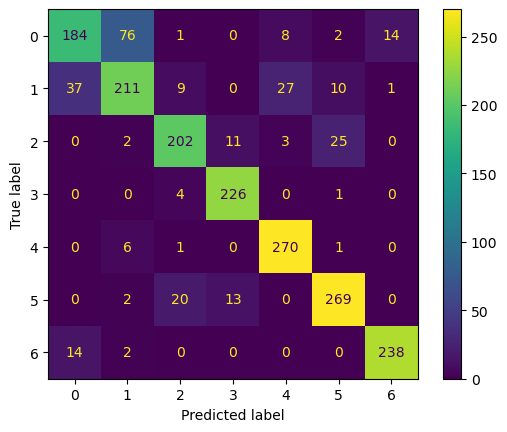

In [35]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)

ConfusionMatrixDisplay.from_predictions(y_test_cat, y_test_hat_cat)
plt.show()